In [33]:
import tensorflow 
tensorflow.config.run_functions_eagerly(True)  # Enable eager execution
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
import matplotlib.pyplot as plt

In [2]:
img_size = (224, 224)
batch = 32

In [3]:
train_ds = image_dataset_from_directory(
	'D:/dog vs cat/train',
	labels = 'inferred',
	label_mode = 'int',
	image_size=img_size,
	batch_size=batch
)
test_ds = image_dataset_from_directory(
	'D:/dog vs cat/test',
	labels = 'inferred',
	label_mode = 'int',
	image_size=img_size,
	batch_size=batch
)

Found 20000 files belonging to 2 classes.
Found 4995 files belonging to 2 classes.


In [4]:
# prefetching 
autotune = tensorflow.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=autotune)
test_ds = test_ds.prefetch(buffer_size=autotune)

In [5]:
# data augumentation 
data_augumentation = tensorflow.keras.Sequential([
	layers.RandomFlip("horizontal"),
	layers.RandomRotation(0.2),
	layers.RandomZoom(0.2),
	layers.RandomBrightness(0.2)
])

In [19]:
# load model 
base_model = MobileNet(input_shape = img_size + (3,), include_top=False, weights = 'imagenet') # (Optional shape tuple, only to be specified if include_top is False)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
base_model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [21]:
base_model.trainable = False

In [22]:
# create model
input = layers.Input(shape=(224, 224, 3))
x = data_augumentation(input)
x = tensorflow.keras.applications.mobilenet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='sigmoid')(x)

In [24]:
model = tensorflow.keras.Model(inputs = input, outputs = output)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_7 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_7 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [26]:
adam = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 333s 532ms/step - accuracy: 0.9456 - loss: 0.1334 - val_accuracy: 0.9802 - val_loss: 0.0537
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 314s 502ms/step - accuracy: 0.9564 - loss: 0.1061 - val_accuracy: 0.9822 - val_loss: 0.0480
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 319s 510ms/step - accuracy: 0.9581 - loss: 0.1064 - val_accuracy: 0.9814 - val_loss: 0.0465


In [29]:
loss, acc = model.evaluate(test_ds)
print(f"Validation Accuracy: {acc:.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 359ms/step - accuracy: 0.9814 - loss: 0.0465
Validation Accuracy: 0.98


In [36]:
# fine tuning
base_model.trainable = True
for layer in base_model.layers[:-30]: # unfrezze last 50 layers
	layer.trainable = False

In [38]:
adam = tensorflow.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
fine_tune_history = model.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 1239s 2s/step - accuracy: 0.9446 - loss: 0.1400 - val_accuracy: 0.9828 - val_loss: 0.0454
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 1261s 2s/step - accuracy: 0.9561 - loss: 0.1114 - val_accuracy: 0.9844 - val_loss: 0.0418
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 1206s 2s/step - accuracy: 0.9571 - loss: 0.1045 - val_accuracy: 0.9862 - val_loss: 0.0390


In [40]:
loss, acc = model.evaluate(test_ds)
print(f"Validation Accuracy: {acc:.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 97s 616ms/step - accuracy: 0.9862 - loss: 0.0390
Validation Accuracy: 0.99


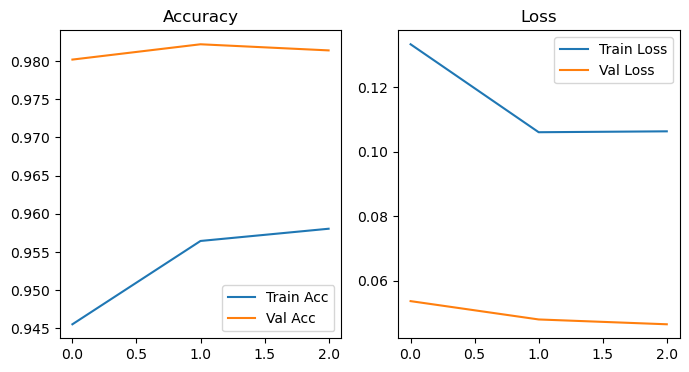

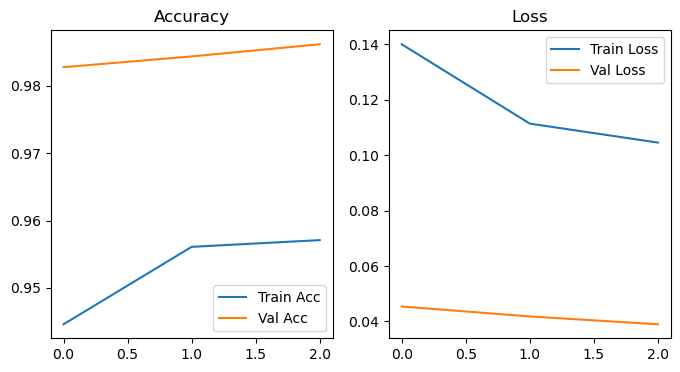

In [41]:
# visulize
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(acc, label="Train Acc")
    plt.plot(val_acc, label="Val Acc")
    plt.legend()
    plt.title("Accuracy")

    plt.subplot(1,2,2)
    plt.plot(loss, label="Train Loss")
    plt.plot(val_loss, label="Val Loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

plot_history(history)
plot_history(fine_tune_history)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "data/cats_and_dogs/test/cat1.jpg"
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
print("Prediction:", "Dog" if pred[0][0] > 0.5 else "Cat")